## Step1: Importing the libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        #X_train, X_test, y_train, y_test = train_test_split(indep_X,dep_Y, test_size = 0.25, random_state = 0)
        
        #Feature Scaling
        #from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def r2_prediction(regressor,X_test,y_test):
     y_pred = regressor.predict(X_test)
     from sklearn.metrics import r2_score
     r2=r2_score(y_test,y_pred)
     return r2
 
def Linear(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2   
    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'linear')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training setC
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor(random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def random(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2 
    
def rfeFeature(indep_X,dep_Y,n):
        rfelist=[]
        
        from sklearn.linear_model import LinearRegression
        lin = LinearRegression()
        
        from sklearn.svm import SVR
        SVRl = SVR(kernel = 'linear')
        
        from sklearn.svm import SVR
        #SVRnl = SVR(kernel = 'rbf')
        
        from sklearn.tree import DecisionTreeRegressor
        dec = DecisionTreeRegressor(random_state = 0)
        
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
        
        
        rfemodellist=[lin,SVRl,dec,rf] 
        for model in rfemodellist:
            print(model)
            log_rfe = RFE(estimator=model, n_features_to_select=n)
            log_fit = log_rfe.fit(indep_X, dep_Y)
            log_rfe_feature=log_fit.transform(indep_X)
            rfelist.append(log_rfe_feature)
        return rfelist
    
def rfe_regression(acclog,accsvml,accdes,accrf): 
    
    rfedataframe=pd.DataFrame(index=['Linear','SVC','Random','DecisionTree'],columns=['Linear','SVMl',
                                                                                        'Decision','Random'])

    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Linear'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
    return rfedataframe

## Step 2: Importing the Dataset

In [4]:
co2_data = pd.read_csv('co2.csv')

In [5]:
co2_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [7]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
co2_data.shape

(7385, 12)

In [10]:
# Check for duplicates
co2_data.duplicated().sum()

1103

In [12]:
# Drop the duplicates
co2_data.drop_duplicates(inplace = True)
co2_data.duplicated().sum()

0

In [14]:
# Check for missing values
co2_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [15]:
co2_data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [19]:
def quanQual(co2_data):
    quan=[]
    qual=[]
    for columnName in co2_data.columns:
        #print(columnName)
        if(co2_data[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [20]:
quan,qaul=quanQual(co2_data)

In [21]:
co2_data[quan]

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [23]:
co2_data[qaul]

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [25]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                               "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=co2_data[columnName].mean()
    descriptive[columnName]["Median"]=co2_data[columnName].median()
    descriptive[columnName]["Mode"]=co2_data[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=co2_data.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=co2_data.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=co2_data.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(co2_data[columnName],99)
    descriptive[columnName]["Q4:100%"]=co2_data.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=co2_data[columnName].min()
    descriptive[columnName]["Max"]=co2_data[columnName].max()
    

In [26]:
descriptive

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Mean,3.161812,5.618911,12.61022,9.070583,11.017876,27.411016,251.157752
Median,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Mode,2.0,4,11.9,7.8,9.4,25,221
Q1:25%,2.0,4.0,10.1,7.5,8.9,22.0,208.0
Q2:50%,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Q3:75%,3.7,6.0,14.7,10.3,12.7,32.0,289.0
99%,6.6,12.0,22.3,16.1,19.519,50.0,414.0
Q4:100%,8.4,16.0,30.6,20.6,26.1,69.0,522.0
IQR,1.7,2.0,4.6,2.8,3.8,10.0,81.0
1.5rule,2.55,3.0,6.9,4.2,5.7,15.0,121.5


In [27]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)
        

In [29]:
lesser

[]

In [30]:
greater

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

In [33]:
for column in lesser:
    co2_data[column][co2_data[column]<descriptive[column]["Lesser"]]=descriptive[column]["Lesser"]
for column in greater:
    co2_data[column][co2_data[column]>descriptive[column]["Greater"]]=descriptive[column]["Greater"]

In [34]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                               "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=co2_data[columnName].mean()
    descriptive[columnName]["Median"]=co2_data[columnName].median()
    descriptive[columnName]["Mode"]=co2_data[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=co2_data.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=co2_data.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=co2_data.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(co2_data[columnName],99)
    descriptive[columnName]["Q4:100%"]=co2_data.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=co2_data[columnName].min()
    descriptive[columnName]["Max"]=co2_data[columnName].max()
    

In [35]:
descriptive

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Mean,3.154099,5.545845,12.571792,9.026377,10.980086,27.302133,250.832697
Median,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Mode,2.0,4,21.6,7.8,18.4,25,410.5
Q1:25%,2.0,4.0,10.1,7.5,8.9,22.0,208.0
Q2:50%,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Q3:75%,3.7,6.0,14.7,10.3,12.7,32.0,289.0
99%,6.25,9.0,21.6,14.5,18.4,47.0,410.5
Q4:100%,6.25,9.0,21.6,14.5,18.4,47.0,410.5
IQR,1.7,2.0,4.6,2.8,3.8,10.0,81.0
1.5rule,2.55,3.0,6.9,4.2,5.7,15.0,121.5


In [36]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)
        

In [37]:
lesser

[]

In [38]:
greater

[]

In [39]:
co2_data.to_csv("Preprocessedco2_data.csv",index=False)

In [40]:
co2_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,47,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0


In [41]:
def Univariate(co2_data,quan):
    descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                               "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater",
                                    "Min","Max","kurtosis","skew","Var","Std"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=co2_data[columnName].mean()
        descriptive[columnName]["Median"]=co2_data[columnName].median()
        descriptive[columnName]["Mode"]=co2_data[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=co2_data.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=co2_data.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=co2_data.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(co2_data[columnName],99)
        descriptive[columnName]["Q4:100%"]=co2_data.describe()[columnName]["max"]
        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Min"]=co2_data[columnName].min()
        descriptive[columnName]["Max"]=co2_data[columnName].max()
        descriptive[columnName]["kurtosis"]=co2_data[columnName].kurtosis()
        descriptive[columnName]["skew"]=co2_data[columnName].skew()
        descriptive[columnName]["Var"]=co2_data[columnName].var()
        descriptive[columnName]["Std"]=co2_data[columnName].std()
    return descriptive

In [43]:
Univariate(co2_data,quan)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Mean,3.154099,5.545845,12.571792,9.026377,10.980086,27.302133,250.832697
Median,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Mode,2.0,4,21.6,7.8,18.4,25,410.5
Q1:25%,2.0,4.0,10.1,7.5,8.9,22.0,208.0
Q2:50%,3.0,6.0,12.1,8.7,10.6,27.0,246.0
Q3:75%,3.7,6.0,14.7,10.3,12.7,32.0,289.0
99%,6.25,9.0,21.6,14.5,18.4,47.0,410.5
Q4:100%,6.25,9.0,21.6,14.5,18.4,47.0,410.5
IQR,1.7,2.0,4.6,2.8,3.8,10.0,81.0
1.5rule,2.55,3.0,6.9,4.2,5.7,15.0,121.5


In [44]:
co2_data.cov()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.809449,2.087517,3.885400,2.259917,3.160588,-7.319731,67.104682
Cylinders,2.087517,2.693727,4.627802,2.662833,3.751136,-8.775357,80.584888
Fuel Consumption City (L/100 km),3.885400,4.627802,11.759265,6.970836,9.629519,-22.471559,184.819448
Fuel Consumption Hwy (L/100 km),2.259917,2.662833,6.970836,4.561344,5.904060,-13.659380,112.289153
Fuel Consumption Comb (L/100 km),3.160588,3.751136,9.629519,5.904060,7.978108,-18.548990,152.581280
Fuel Consumption Comb (mpg),-7.319731,-8.775357,-22.471559,-13.659380,-18.548990,46.960444,-370.308623
CO2 Emissions(g/km),67.104682,80.584888,184.819448,112.289153,152.581280,-370.308623,3394.887862


In [45]:
co2_data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.945541,0.842311,0.786634,0.831850,-0.794065,0.856184
Cylinders,0.945541,1.000000,0.822258,0.759663,0.809163,-0.780229,0.842683
Fuel Consumption City (L/100 km),0.842311,0.822258,1.000000,0.951806,0.994179,-0.956262,0.925007
Fuel Consumption Hwy (L/100 km),0.786634,0.759663,0.951806,1.000000,0.978711,-0.933294,0.902358
Fuel Consumption Comb (L/100 km),0.831850,0.809163,0.994179,0.978711,1.000000,-0.958306,0.927126
Fuel Consumption Comb (mpg),-0.794065,-0.780229,-0.956262,-0.933294,-0.958306,1.000000,-0.927438
CO2 Emissions(g/km),0.856184,0.842683,0.925007,0.902358,0.927126,-0.927438,1.000000


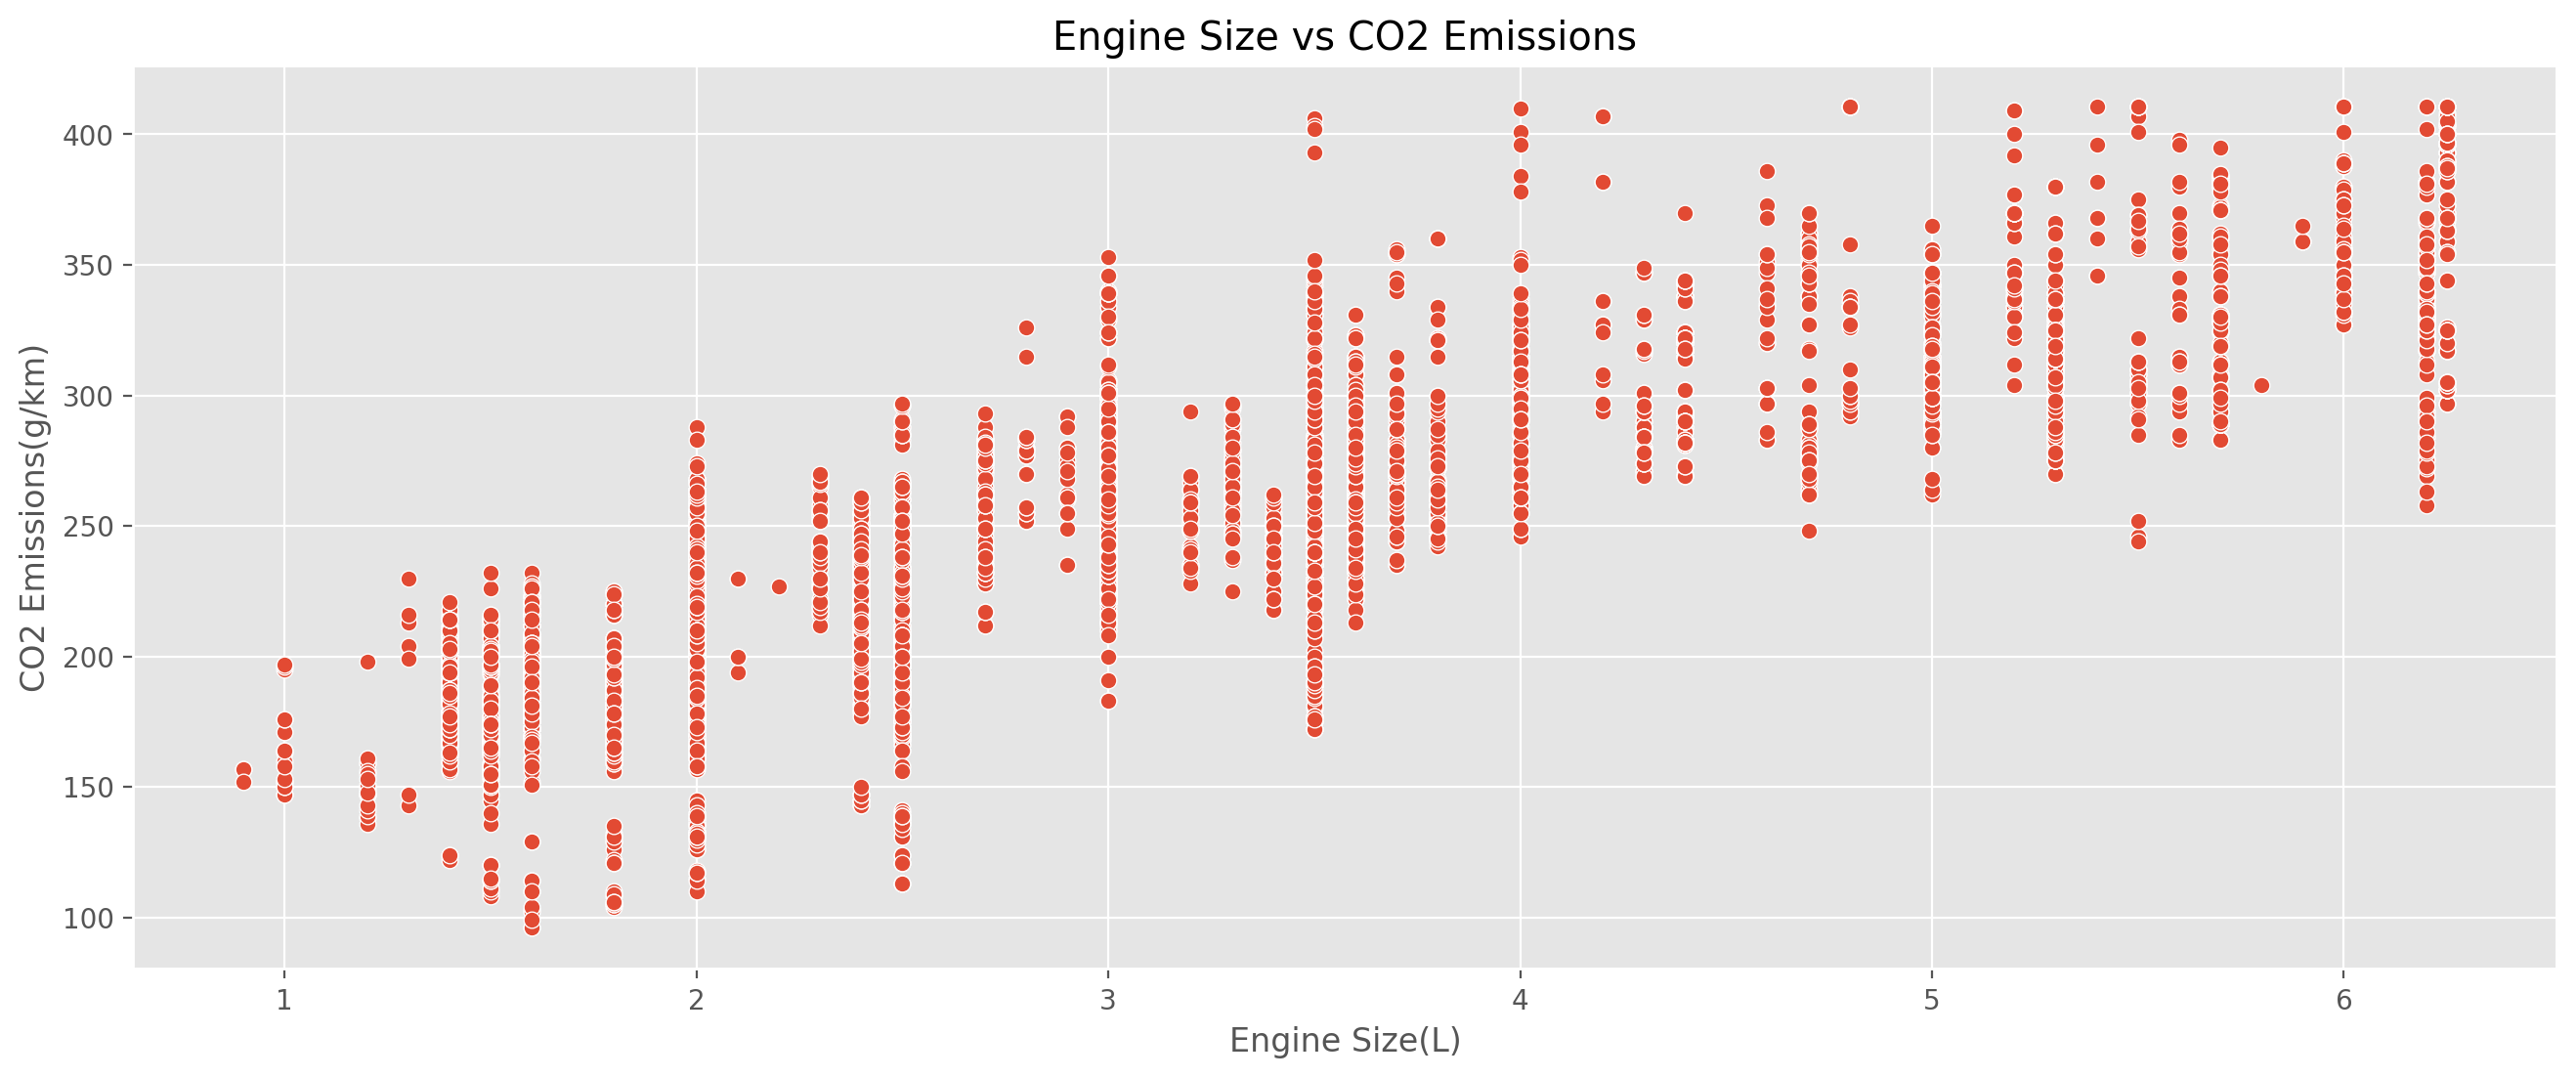

In [50]:
# Engine size and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Engine Size vs CO2 Emissions')
plt.show()

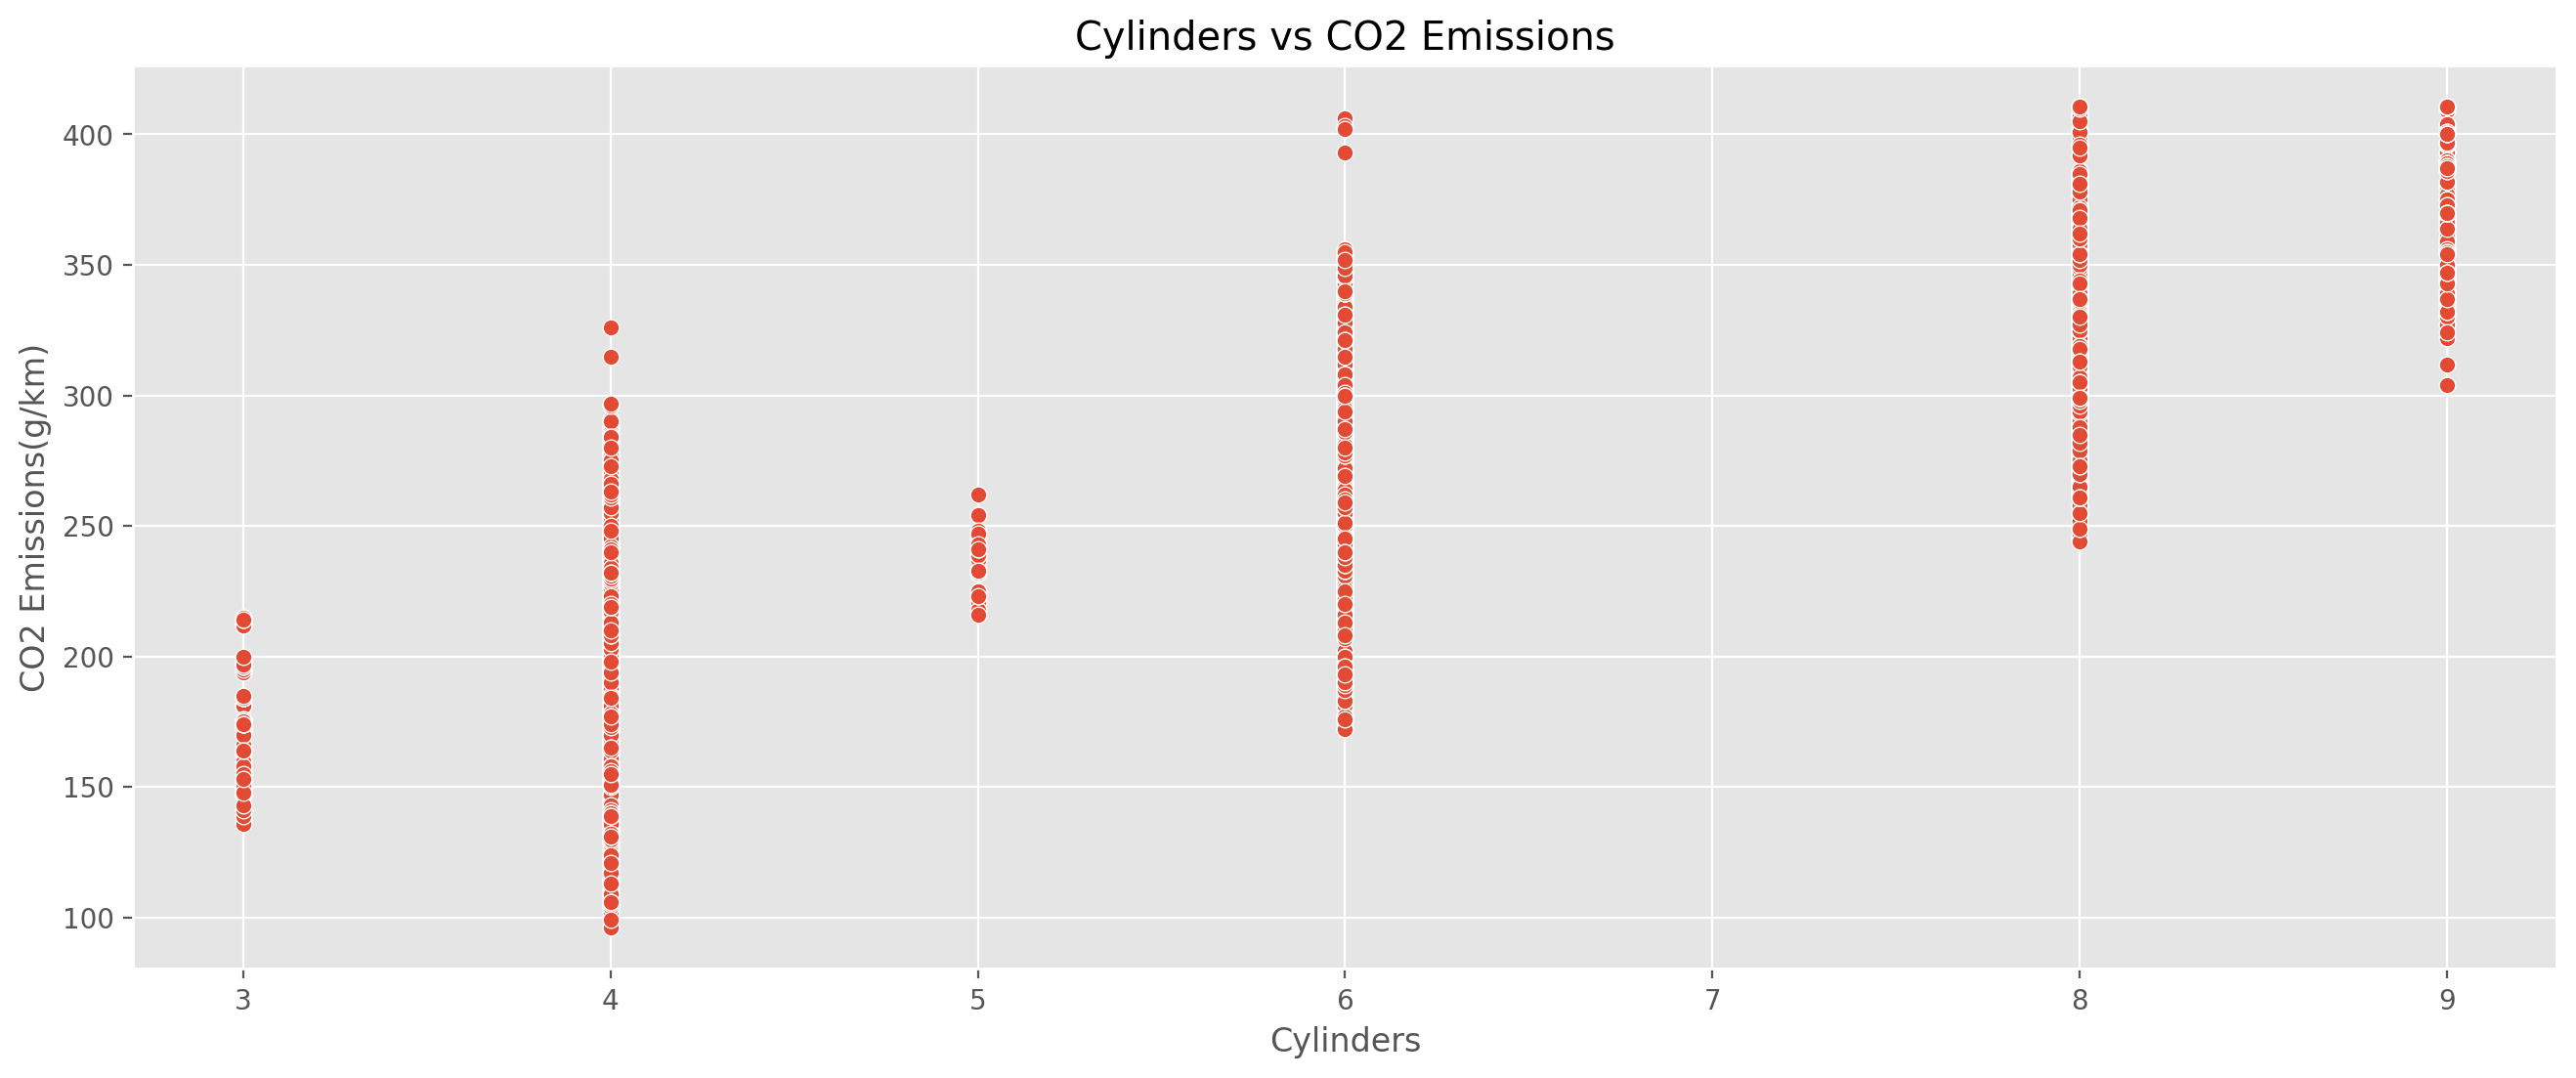

In [51]:
# Cylinders and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Cylinders', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Cylinders vs CO2 Emissions')
plt.show()

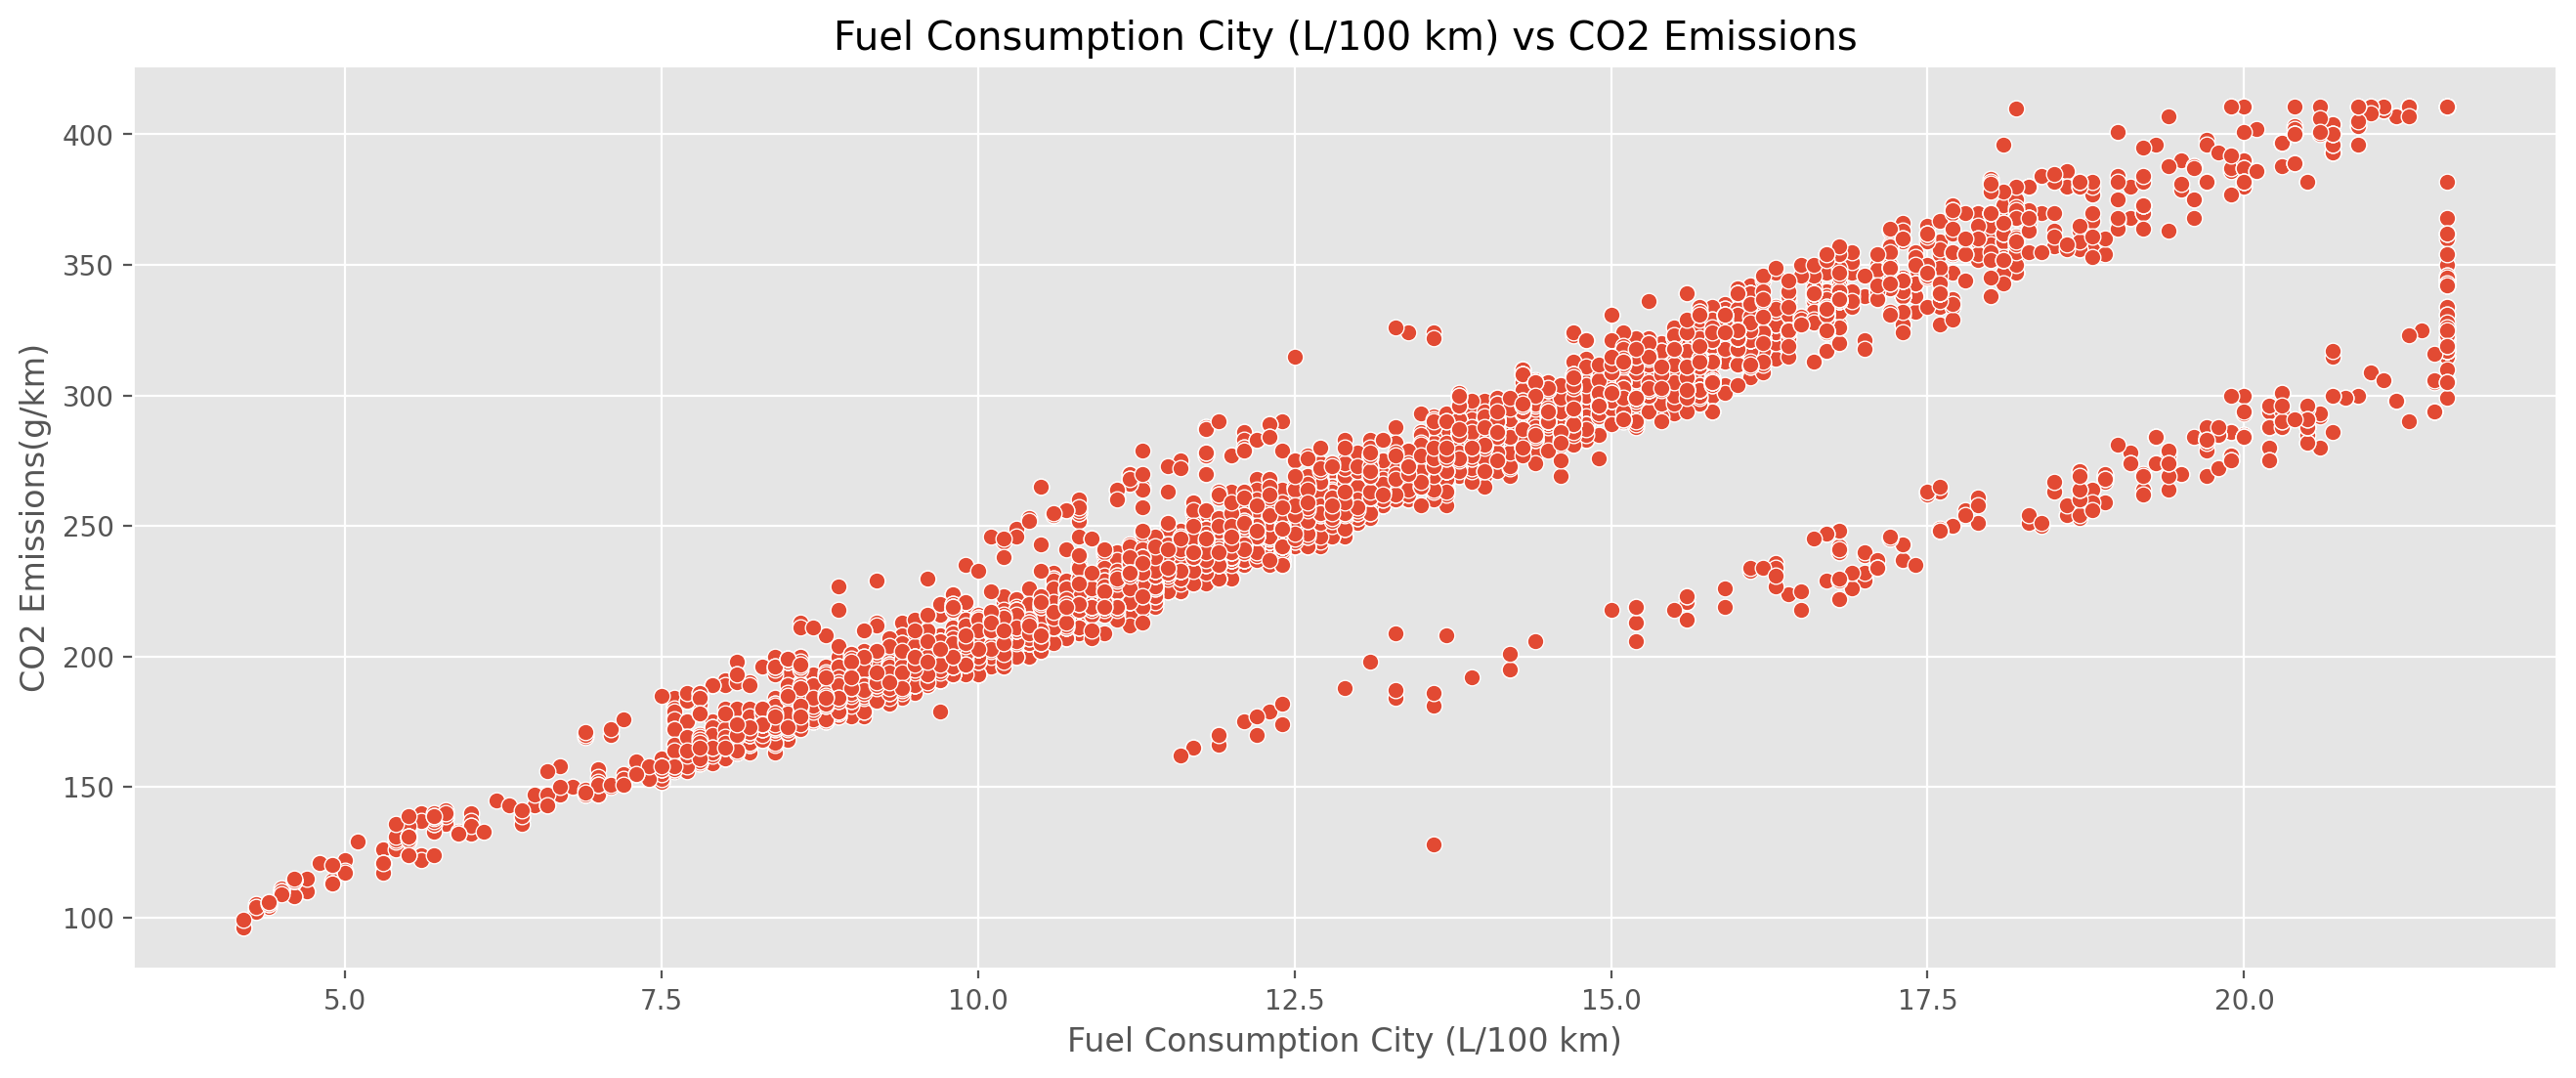

In [52]:
# Fuel Consumption City (L/100 km) and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Fuel Consumption City (L/100 km) vs CO2 Emissions')
plt.show()

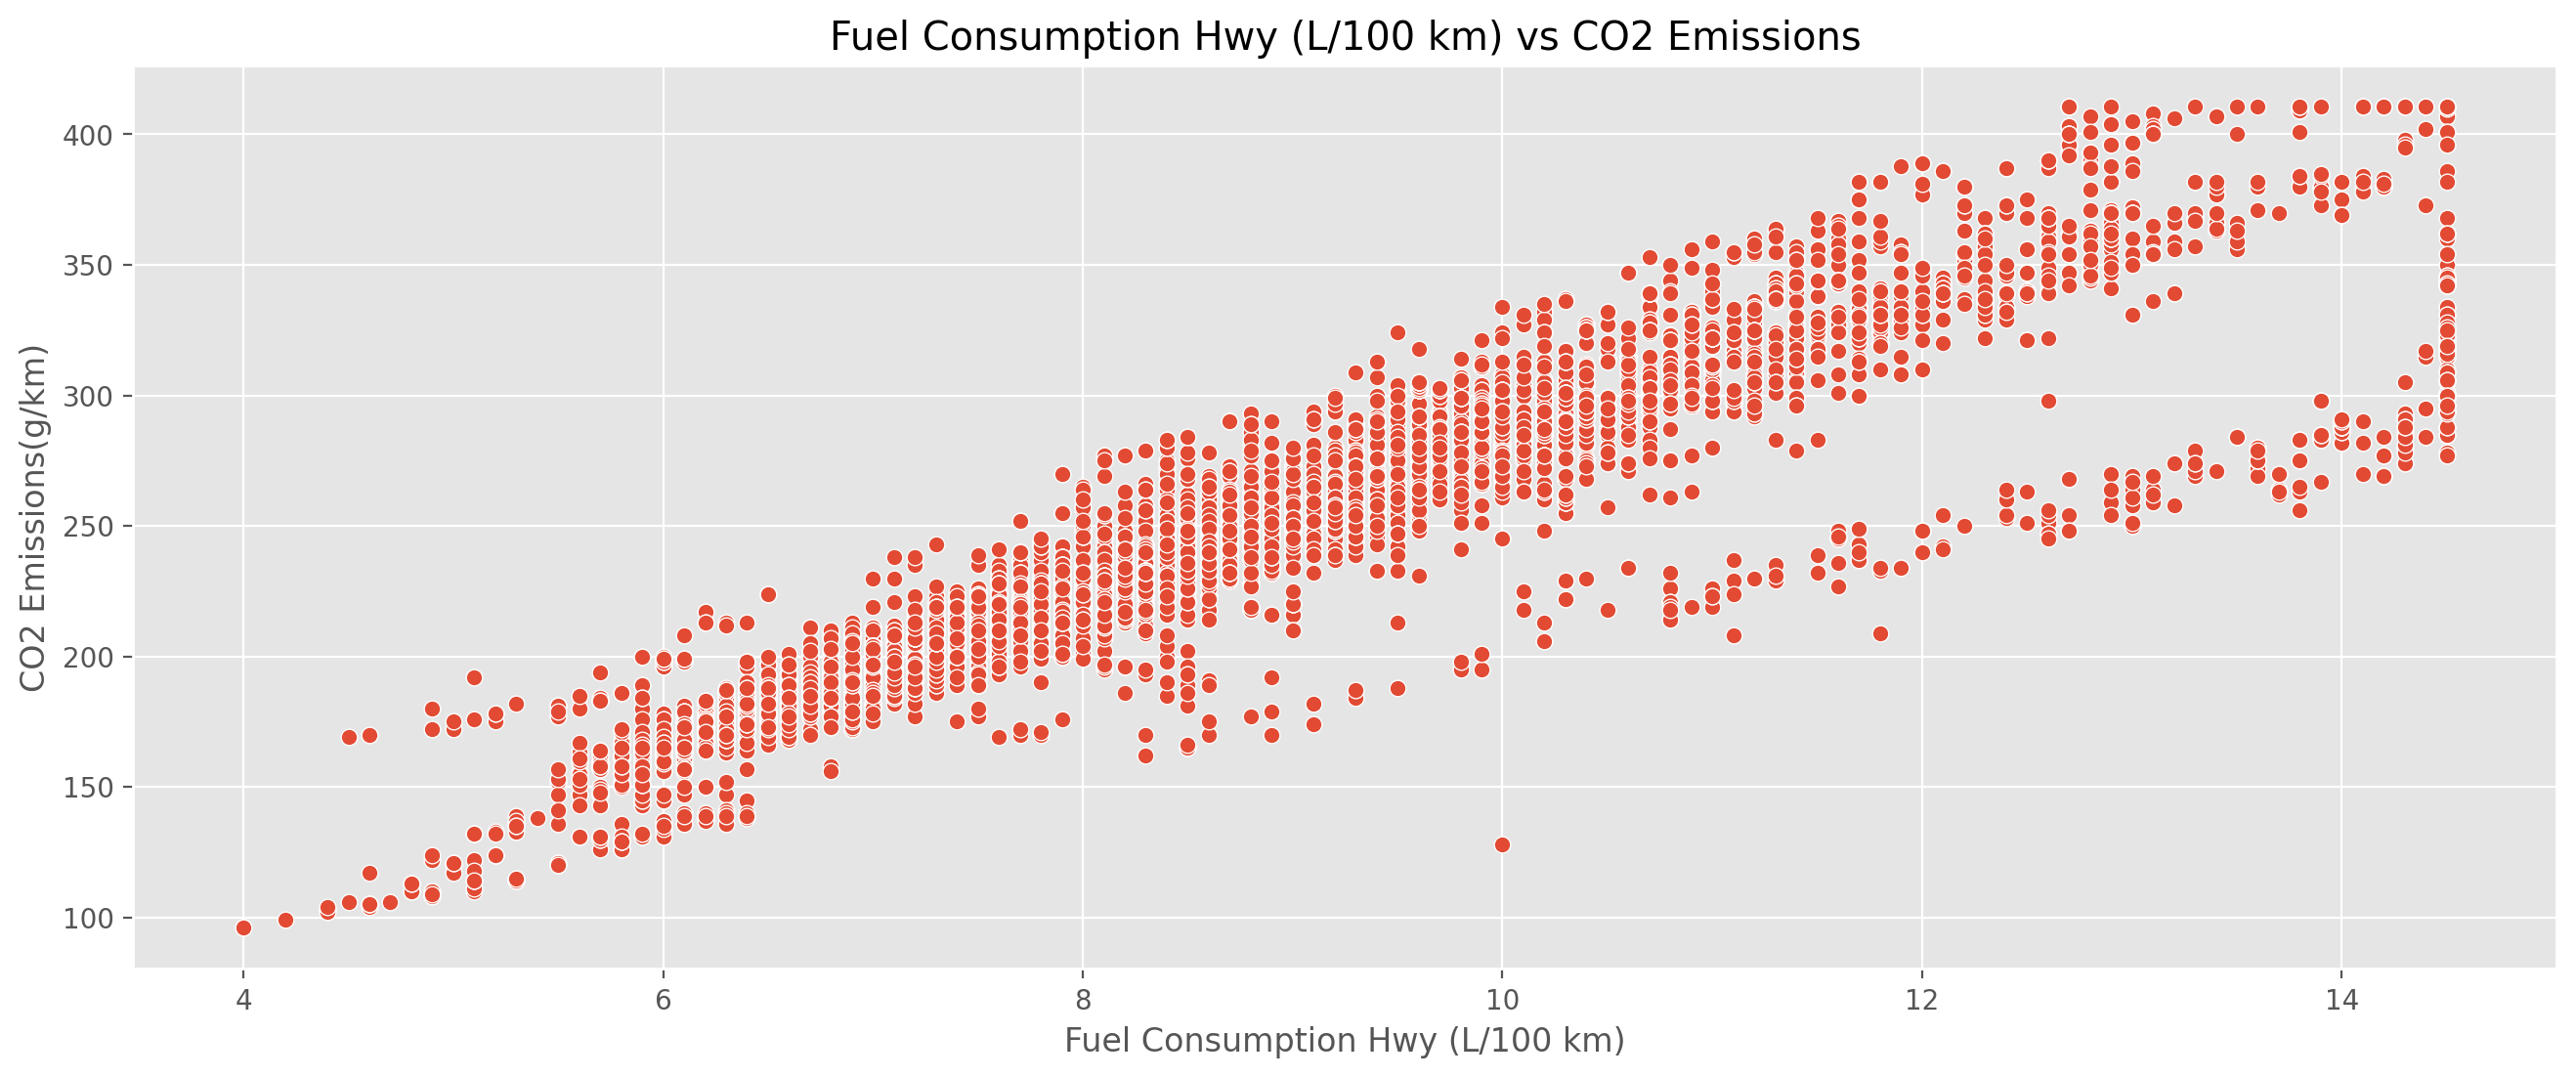

In [53]:
# Fuel Consumption Hwy (L/100 km) and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Fuel Consumption Hwy (L/100 km) vs CO2 Emissions')
plt.show()

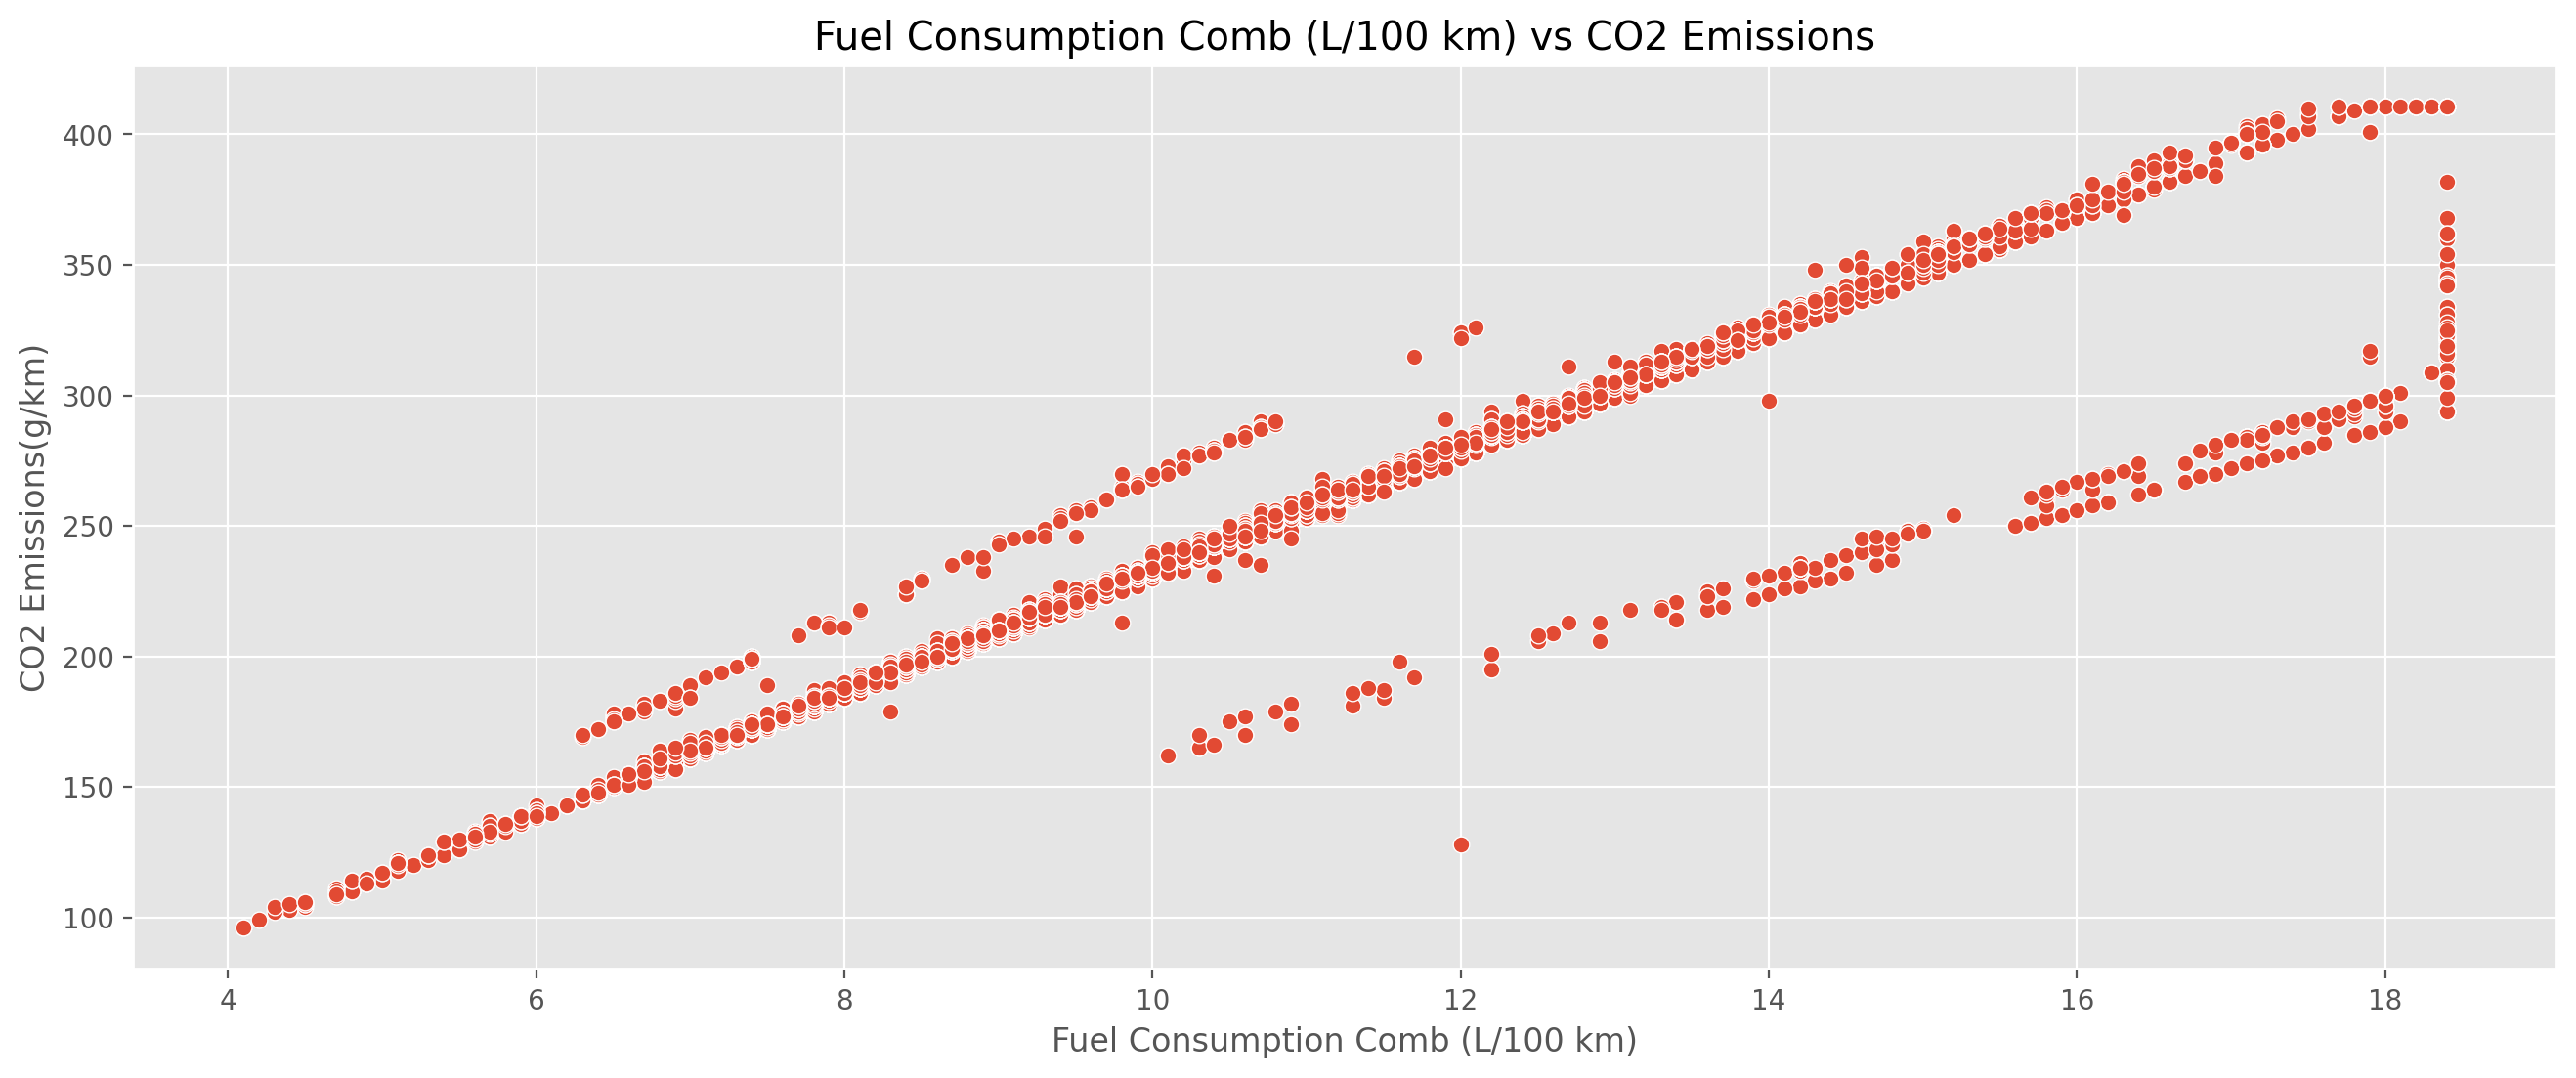

In [54]:
# Fuel Consumption Comb (L/100 km) and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Fuel Consumption Comb (L/100 km) vs CO2 Emissions')
plt.show()

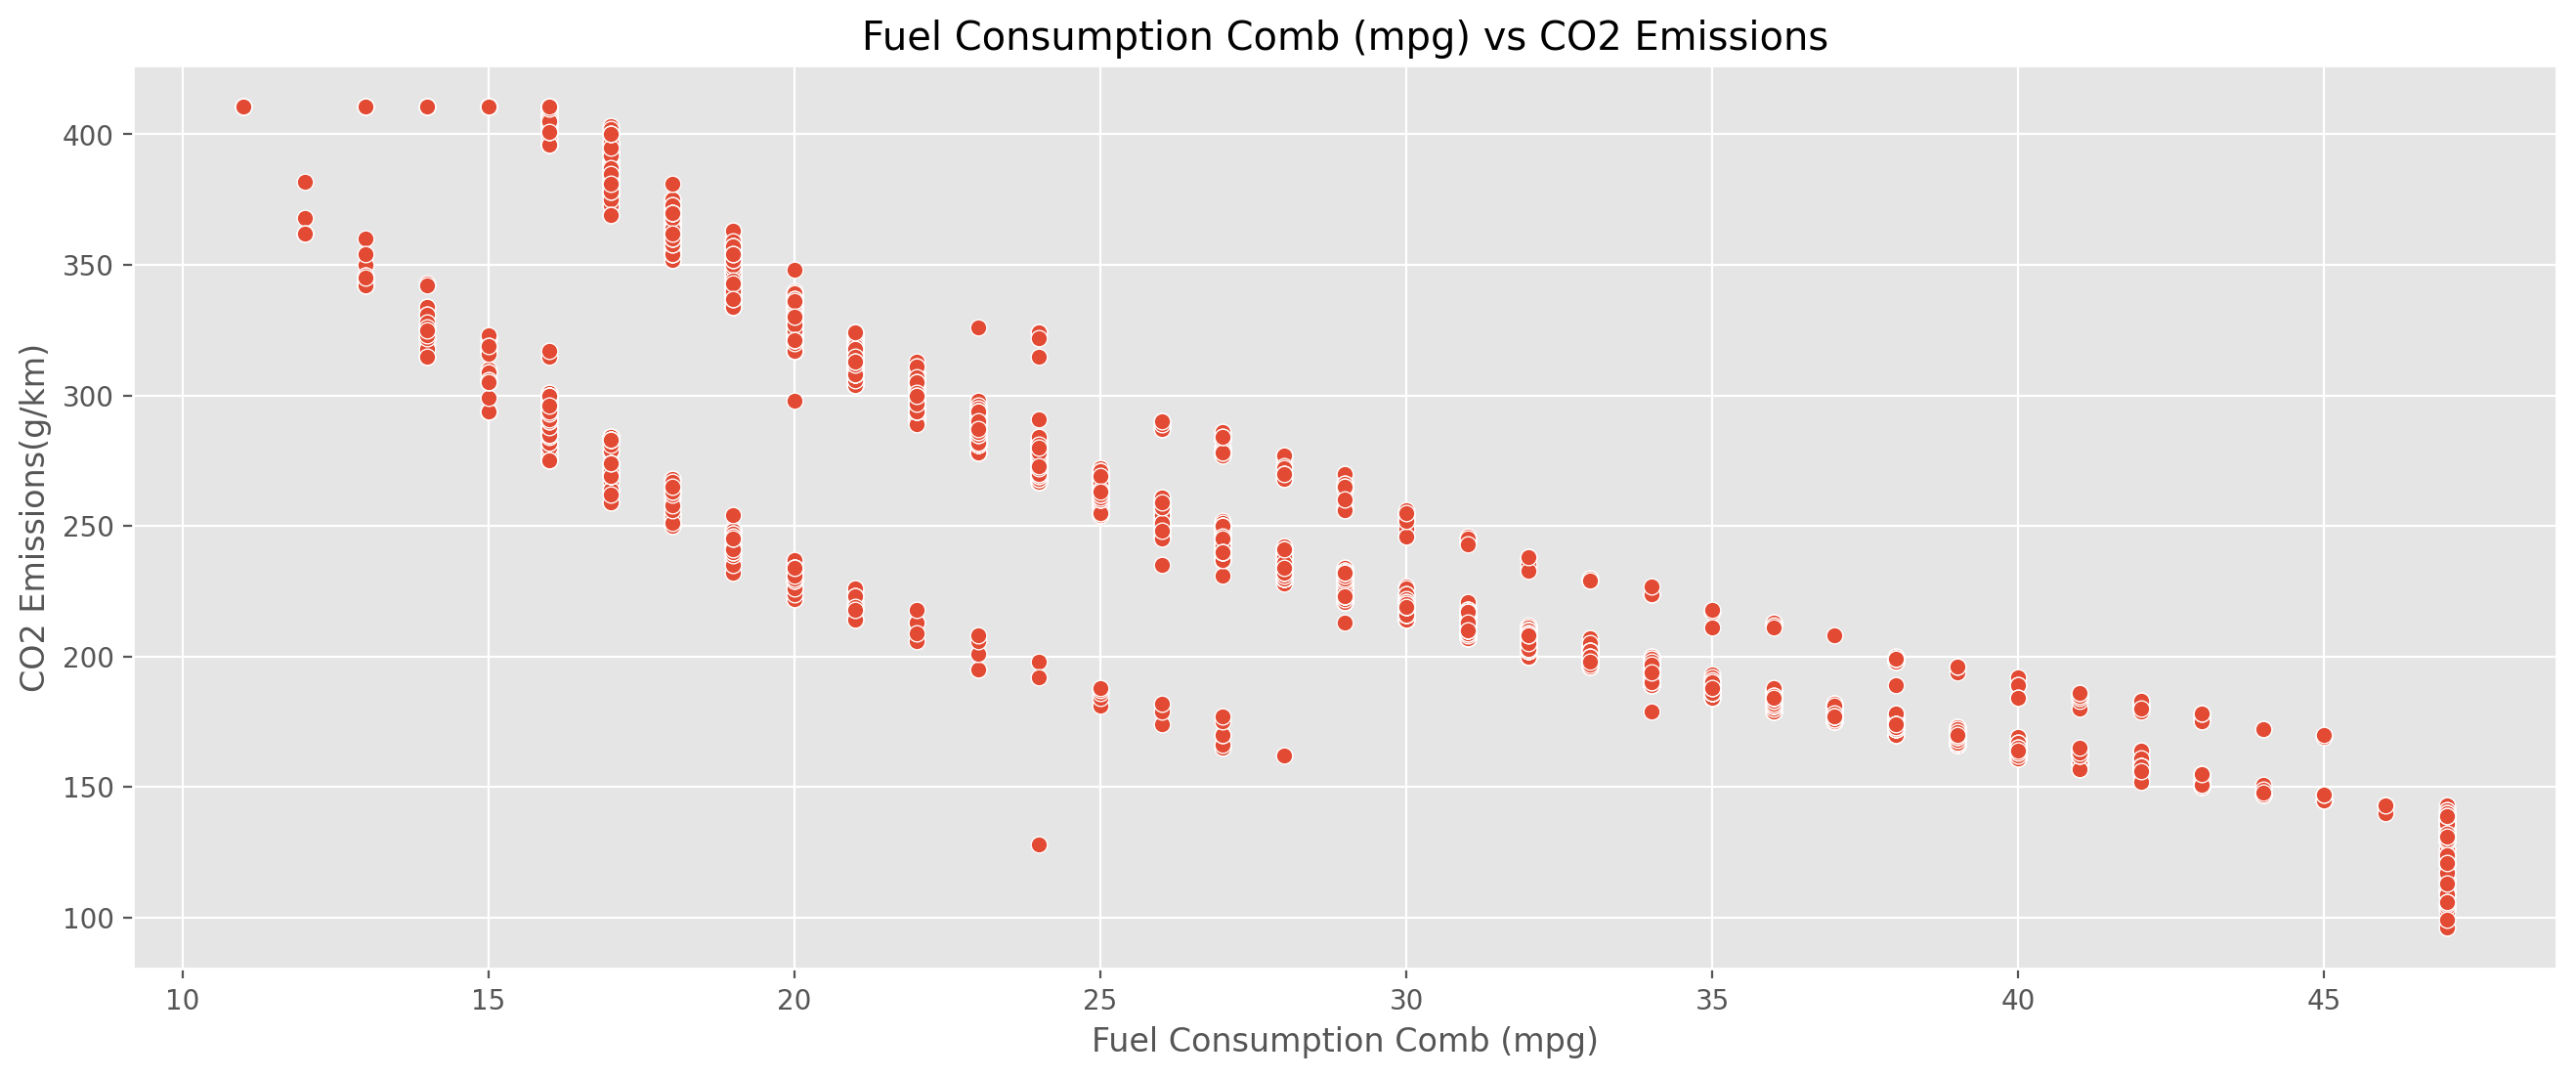

In [55]:
# Fuel Consumption Comb (mpg) and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('Fuel Consumption Comb (mpg) vs CO2 Emissions')
plt.show()

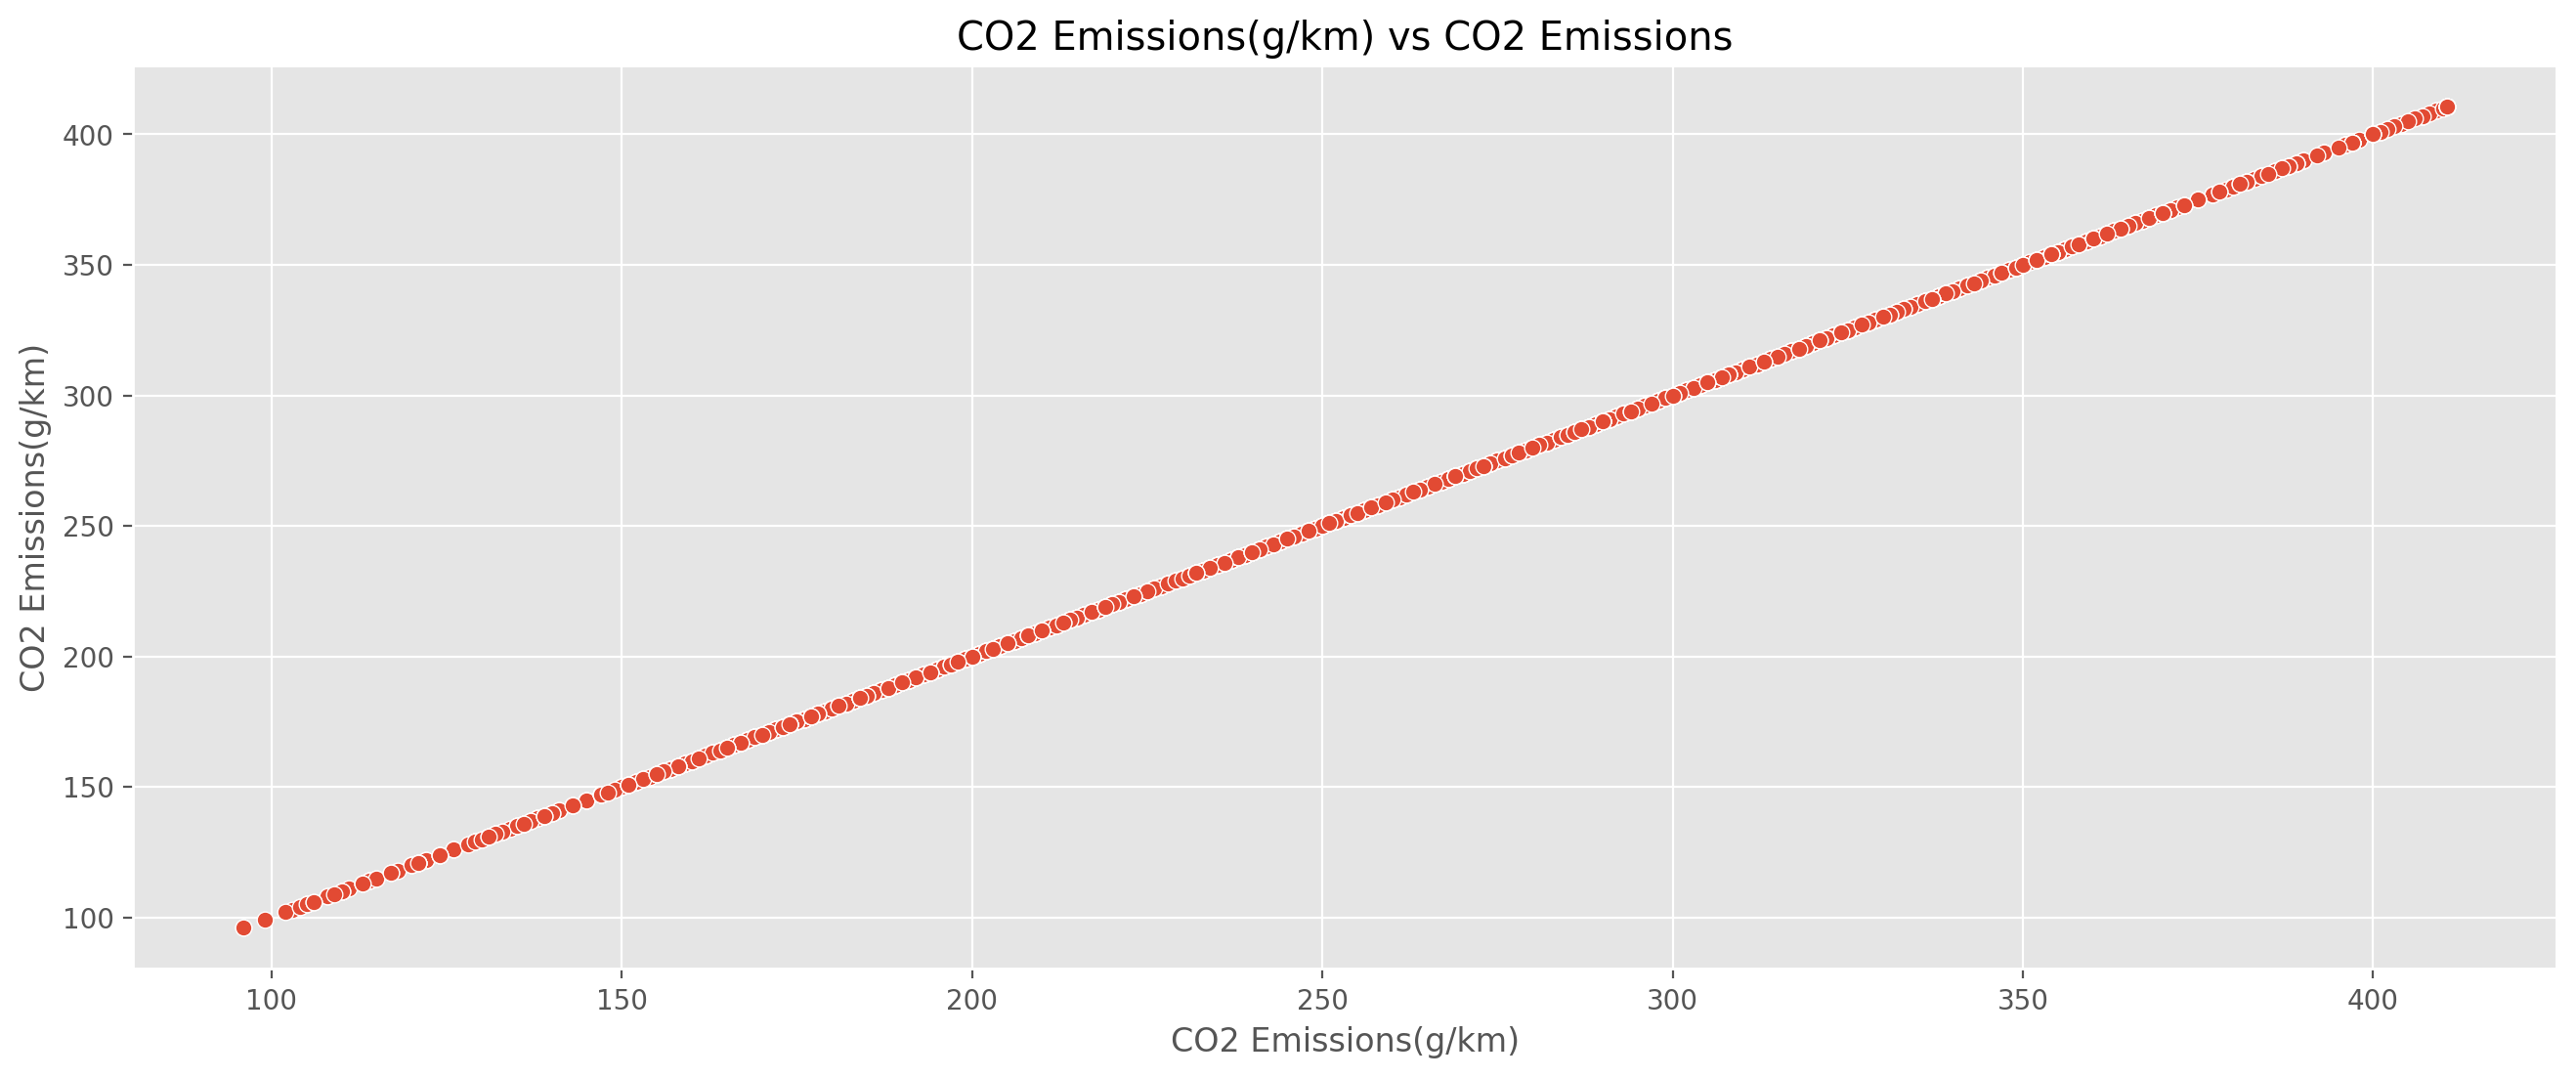

In [56]:
# CO2 Emissions(g/km) and emission
plt.figure(figsize=(16, 6), dpi=200)
sns.scatterplot(x='CO2 Emissions(g/km)', y='CO2 Emissions(g/km)', data=co2_data)
plt.title('CO2 Emissions(g/km) vs CO2 Emissions')
plt.show()

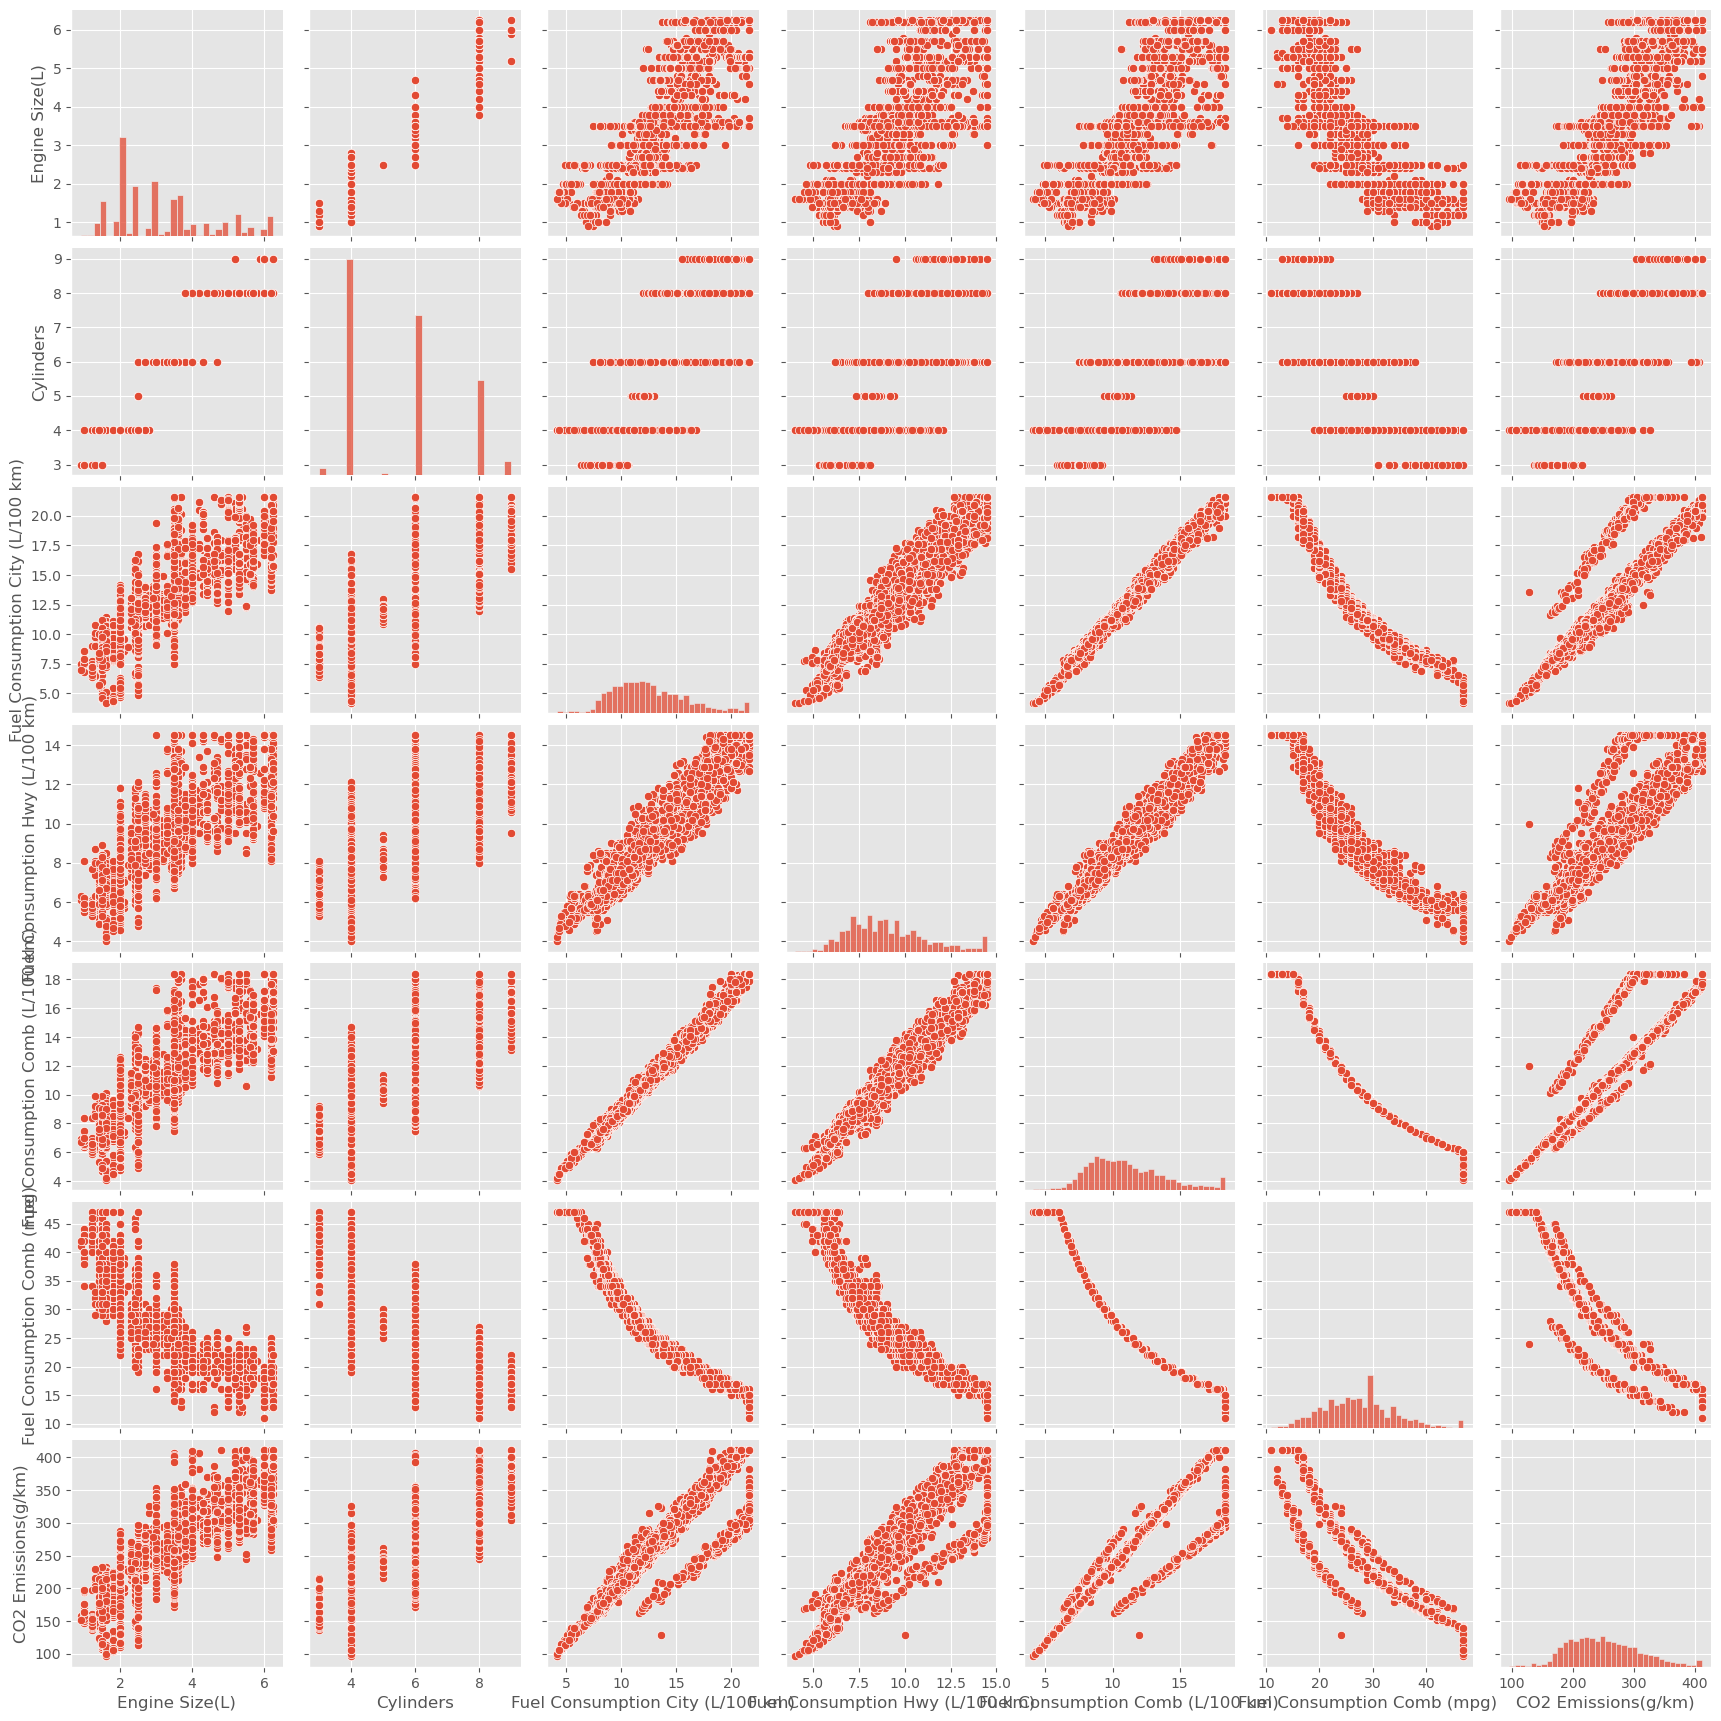

In [57]:
sns.pairplot(co2_data)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [61]:
calc_vif(co2_data[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]])

,variables,VIF
0,Engine Size(L),67.686927
1,Cylinders,123.180754
2,Fuel Consumption City (L/100 km),15613.089599
3,Fuel Consumption Hwy (L/100 km),5556.626551
4,Fuel Consumption Comb (L/100 km),38579.443480
5,Fuel Consumption Comb (mpg),9.630113
6,CO2 Emissions(g/km),162.134308


In [66]:
calc_vif(co2_data[["Engine Size(L)","Cylinders"]])

,variables,VIF
0,Engine Size(L),39.58698
1,Cylinders,39.58698


In [71]:
import scipy.stats as stats

stats.f_oneway(co2_data["Engine Size(L)"],co2_data['Cylinders'],co2_data['Fuel Consumption City (L/100 km)'])


F_onewayResult(statistic=27769.793723451687, pvalue=0.0)

In [100]:
 from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
co2_data['Vehicle Class'] = label_encoder.fit_transform(co2_data['Vehicle Class'])
co2_data['Fuel Type'] = label_encoder.fit_transform(co2_data['Fuel Type'])
co2_data['Transmission'] = label_encoder.fit_transform(co2_data['Transmission'])
print("Unique values in 'Vehicle Class':", co2_data['Vehicle Class'].unique())
print("Unique values in 'Fuel Type':", co2_data['Fuel Type'].unique())
print("Unique values in 'Transmission':",co2_data['Transmission'].unique())

Unique values in 'Vehicle Class': [ 0 11  2 13  3 10  1  9 12 14 15  6  4  7  8  5]
Unique values in 'Fuel Type': [4 0 3 1 2]
Unique values in 'Transmission': [14 25 22 15  8  3  9 23 17  4  5 26  1 24 19  2 16  6 18 21 13  7 10 11
 12  0 20]


In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset1 = pd.read_csv("Preprocessedco2_data.csv", index_col=None)

# Create a copy of the dataset
df2 = dataset1.copy()

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specific columns in `df2` directly
df2['Make'] = label_encoder.fit_transform(df2['Make'])
df2['Model'] = label_encoder.fit_transform(df2['Model'])
df2['Vehicle Class'] = label_encoder.fit_transform(df2['Vehicle Class'])
df2['Fuel Type'] = label_encoder.fit_transform(df2['Fuel Type'])
df2['Transmission'] = label_encoder.fit_transform(df2['Transmission'])

# Print unique values for confirmation
print("Unique values in 'Make':", df2['Make'].unique())
print("Unique values in 'Model':", df2['Model'].unique())
print("Unique values in 'Vehicle Class':", df2['Vehicle Class'].unique())
print("Unique values in 'Fuel Type':", df2['Fuel Type'].unique())
print("Unique values in 'Transmission':", df2['Transmission'].unique())

# Define independent (X) and dependent (Y) variables
indep_X = df2.drop('CO2 Emissions(g/km)', axis=1)  # axis=1 is required for column drop
dep_Y = df2['CO2 Emissions(g/km)']

Unique values in 'Make': [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 14  6]
Unique values in 'Model': [1057 1058 1233 ... 1822  389 1950]
Unique values in 'Vehicle Class': [ 0 11  2 13  3 10  1  9 12 14 15  6  4  7  8  5]
Unique values in 'Fuel Type': [4 0 3 1 2]
Unique values in 'Transmission': [14 25 22 15  8  3  9 23 17  4  5 26  1 24 19  2 16  6 18 21 13  7 10 11
 12  0 20]


In [108]:
df2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196.0
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221.0
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,47,136.0
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255.0
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219.0
6278,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232.0
6279,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240.0
6280,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232.0


In [110]:
rfelist=rfeFeature(indep_X,dep_Y,3)       

acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]

LinearRegression()
SVR(kernel='linear')
DecisionTreeRegressor(random_state=0)
RandomForestRegressor(n_estimators=10, random_state=0)


In [113]:
rfelist

[array([[ 2. ,  4. ,  8.5],
        [ 2.4,  4. ,  9.6],
        [ 1.5,  4. ,  5.9],
        ...,
        [ 2. ,  4. , 10.3],
        [ 2. ,  4. ,  9.9],
        [ 2. ,  4. , 10.7]]),
 array([[ 9.9,  6.7,  8.5],
        [11.2,  7.7,  9.6],
        [ 6. ,  5.8,  5.9],
        ...,
        [11.7,  8.6, 10.3],
        [11.2,  8.3,  9.9],
        [12.2,  8.7, 10.7]]),
 array([[ 4. ,  8.5, 33. ],
        [ 4. ,  9.6, 29. ],
        [ 4. ,  5.9, 47. ],
        ...,
        [ 4. , 10.3, 27. ],
        [ 4. ,  9.9, 29. ],
        [ 4. , 10.7, 26. ]]),
 array([[ 4. ,  8.5, 33. ],
        [ 4. ,  9.6, 29. ],
        [ 4. ,  5.9, 47. ],
        ...,
        [ 4. , 10.3, 27. ],
        [ 4. ,  9.9, 29. ],
        [ 4. , 10.7, 26. ]])]

In [111]:
for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)  
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)
    
    
result=rfe_regression(acclin,accsvml,accdes,accrf)


In [112]:
result

,Linear,SVMl,Decision,Random
Linear,0.90458,0.825171,0.995221,0.995789
SVC,0.856047,0.803095,0.912001,0.931494
Random,0.899283,0.822842,0.996636,0.997346
DecisionTree,0.899283,0.822842,0.996636,0.997346


In [115]:
indep_X

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,47
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...
6277,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30
6278,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29
6279,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27
6280,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29


In [116]:
dep_Y

0       196.0
1       221.0
2       136.0
3       255.0
4       244.0
        ...  
6277    219.0
6278    232.0
6279    240.0
6280    232.0
6281    248.0
Name: CO2 Emissions(g/km), Length: 6282, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(indep_X, dep_Y , test_size=0.30,random_state=0)

In [118]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [119]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [120]:
r_score

0.9936495850898253

In [121]:
import pickle
filename="finalized_Co2 emission.sav"
pickle.dump(regressor,open(filename,'wb'))

In [123]:
loaded_model=pickle.load(open("finalized_Co2 emission.sav",'rb'))
result=loaded_model.predict([[0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33]])

In [124]:
result

array([196.])